#Parte I

In [25]:
import numpy as np
import matplotlib.pyplot as plt

##Importando os dados



In [26]:
def import_dados(caminho):
  dt = np.dtype(float)
  arq = np.fromfile(caminho, dtype=dt)

  ret = np.empty((0, 3), float)

  for i in range(0, len(arq), 3):
    linha = np.array([[arq[i], arq[i+1], arq[i+2]]])
    ret = np.append(ret, linha, axis=0)

  return ret

filename = '/content/drive/My Drive/dados_colab/Redes Neurais/PP2/dataAll.txt'
dados_All = import_dados(filename)

##Perceptron
Algoritmo de treinamento do perceptron

In [27]:
n = 0.1 #Taxa de aprendizado
teta = 0 #Degrau usado na função de ativação
w = np.random.uniform(-0.5, 0.5, (1, 3)) #Vetor de pesos inicial
print("Vetor inicial de pesos: {}\n".format(w[0]))

def funcao(u): #Função de ativação
  if(u >= teta):
    return 1
  else:
    return 0

i = 0
ult_indice = len(dados_All) - 1
encerrar = True
qtd_epocas = 0
total_ajustes = 0

while i <= ult_indice:
  
  if (i == 0): #Verifica a a quantidade de épocas
    qtd_epocas += 1
    print('Época: {}'.format(qtd_epocas))
  
  linha = dados_All[i]
  yd = linha[2]
  x = np.array([-1, linha[0], linha[1]])

  u = 0
  for j in range(3):
    u += (x[j] * w[-1][j])

  y = funcao(u) #Chama a função de ativação
  e = yd - y #Erro

  if (e != 0): #Há necessidade de aprendizagem
    print('Ajuste do peso: {} -> Exemplo: {}'.format(w[-1], i + 1))
    peso_novo = np.array([w[-1] + ((n * e) * x)]) #Delta
    w = np.append(w, peso_novo, axis=0) #Começa a próxima época
    encerrar = False
    total_ajustes += 1

  if (ult_indice == i): #Última linha
    print('Número de ajustes: {}'.format(total_ajustes))
    print('Vetor de pesos: ', w[-1])
    print('\n')
    if (encerrar == False):
      total_ajustes = 0
      encerrar = True
      i = -1 #Vai para o começo do array de dados

  i += 1

print('Total de ajustes: ', len(w) - 1)
print('Total de épocas: ', qtd_epocas)

Vetor inicial de pesos: [-0.03177232 -0.124838    0.1702799 ]

Época: 1
Ajuste do peso: [-0.03177232 -0.124838    0.1702799 ] -> Exemplo: 1
Ajuste do peso: [  0.06822768  36.254002   -24.2439501 ] -> Exemplo: 4
Ajuste do peso: [   0.16822768  -17.405048   -100.7397001 ] -> Exemplo: 8
Ajuste do peso: [  0.06822768  55.390972   -64.9101401 ] -> Exemplo: 19
Ajuste do peso: [-3.17723212e-02  1.37989672e+02  1.49456899e+01] -> Exemplo: 27
Ajuste do peso: [ 6.82276788e-02  1.43835432e+02 -6.33489001e+01] -> Exemplo: 32
Ajuste do peso: [   0.16822768  103.826522   -141.2415901 ] -> Exemplo: 44
Ajuste do peso: [  0.26822768 157.496332   -92.1493201 ] -> Exemplo: 46
Ajuste do peso: [   0.16822768  104.536272   -149.0187801 ] -> Exemplo: 48
Ajuste do peso: [  0.26822768 164.095792   -98.8964501 ] -> Exemplo: 72
Ajuste do peso: [   0.16822768  118.571162   -164.5323801 ] -> Exemplo: 108
Ajuste do peso: [  0.26822768 209.287022   -89.8190601 ] -> Exemplo: 111
Ajuste do peso: [   0.16822768  151.50

##Classes binárias
Separando os exemplos segundos os valores de yd correspondentes as classes binárias.
* O ndarray zero corresponde a classe 0.
* O ndarray um corresponde a classe 1.

In [28]:
def zero_func(dados_func):
  vet = np.empty((0,3), float)

  for x in range(len(dados_func)):
    if (dados_func[x][2] == 0):
      temp = np.array([dados_func[x]])
      vet = np.append(vet, temp, axis=0)

  return vet

def um_func(dados_func):
  vet = np.empty((0,3), float)

  for x in range(len(dados_func)):
    if (dados_func[x][2] == 1):
      temp = np.array([dados_func[x]])
      vet = np.append(vet, temp, axis=0)
  
  return vet

##Gráfico
* A cor vermelha é correspondente a classe 0 dos valores de yd.
* A cor azul é correspondente a classe 1 dos valores de yd.

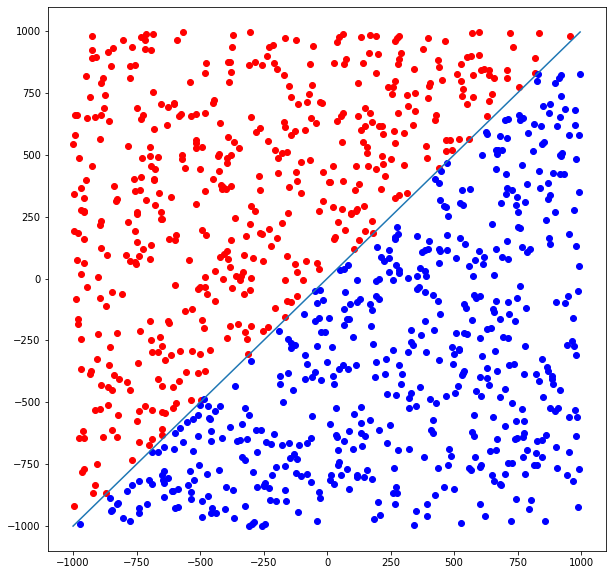

In [29]:
def intervalo_x(dados_func):
  maximo = np.max(dados_func)
  minimo = np.min(dados_func)
  intervalo = maximo - minimo

  if (intervalo > 50):
    return np.arange(minimo, maximo, 1)
  elif (intervalo > 5):
    return np.arange(minimo, maximo, 0.1)
  else: 
    return np.arange(minimo, maximo, 0.01)

peso = w[-1]
x = intervalo_x(dados_All)

zero = zero_func(dados_All)
um = um_func(dados_All)

plt.figure(figsize=(10, 10))
plt.scatter(zero[0:,0],zero[0:,1], color='red')  #vermelho
plt.scatter(um[0:,0],um[0:,1], color='blue')     #Azul
plt.plot(x, (peso[0]/peso[2]) - ((peso[1]/peso[2]) * x))
plt.show()

#Parte II - Experimentação

##Perceptron
Algoritmo de treinamento perceptron

In [30]:
qtd_execucoes = 100
n = np.array([0.4, 0.1, 0.01])          #Taxa de aprendizado
I = np.array([np.array([-100, 100]), np.array([-1, 1]), np.array([-0.5, 0.5])])
pesos_9 = np.empty((0,3), float)        #Guardando pesos para as 9 configurações
m_dp = np.empty((0, 4), float)          #Matriz de média e desvio padrão

arquivo = '/content/drive/My Drive/dados_colab/Redes Neurais/PP2/data2.txt'
dados_teste = import_dados(arquivo)     #Importando dados

for a in range(len(n)):
  for b in range(len(I)):
    matriz_AE = np.empty((0, 2), int)

    for c in range(qtd_execucoes):

      w = np.random.uniform(I[b][0], I[b][1], (1, 3))  #Vetor de pesos inicial

      i = 0
      ultimo_indice = len(dados_teste) - 1
      encerrar = True
      qtd_epocas = 0
      n_ajustes = 0
      total_ajustes = 0

      while i <= ultimo_indice:
    
        if (i == 0):                                   #Verifica a a quantidade de épocas
          qtd_epocas += 1
    
        linha = dados_teste[i]
        yd = linha[2]
        x = np.array([-1, linha[0], linha[1]])

        u = 0
        for j in range(3):
          u += (x[j] * w[0][j])

        y = funcao(u)                                  #Chama a função de ativação
        e = yd - y                                     #Erro

        if (e != 0):                                   #Há necessidade de aprendizagem
          w = np.array([w[0] + ((n[a] * e) * x)])      #Delta
          encerrar = False
          n_ajustes += 1

        if (ultimo_indice == i):                       #Última linha
          if (encerrar == False):
            total_ajustes += n_ajustes
            n_ajustes = 0
            encerrar = True
            i = -1                                     #Vai para o começo do array de dados

        i += 1

      temp_array = np.array([[total_ajustes, qtd_epocas]])
      matriz_AE = np.append(matriz_AE, temp_array, axis=0) #Adiciona na matriz o total de ajustes e a quantidade de épocas

    pesos_9 = np.append(pesos_9, w, axis=0)                #Armazena o resultado dos pesos obtidos a cada 100 interações

    aj_media = np.mean(matriz_AE[0:,0])
    aj_desvio_padrao = np.std(matriz_AE[0:,0])
    ep_media = np.mean(matriz_AE[0:,1])
    ep_desvio_padrao = np.std(matriz_AE[0:,1])

    temp_array = np.array([[aj_media, aj_desvio_padrao, ep_media, ep_desvio_padrao]])
    m_dp = np.append(m_dp, temp_array, axis=0)             #Armazena média e desvio padrão das 9 configurações

##Gráfico de convergência

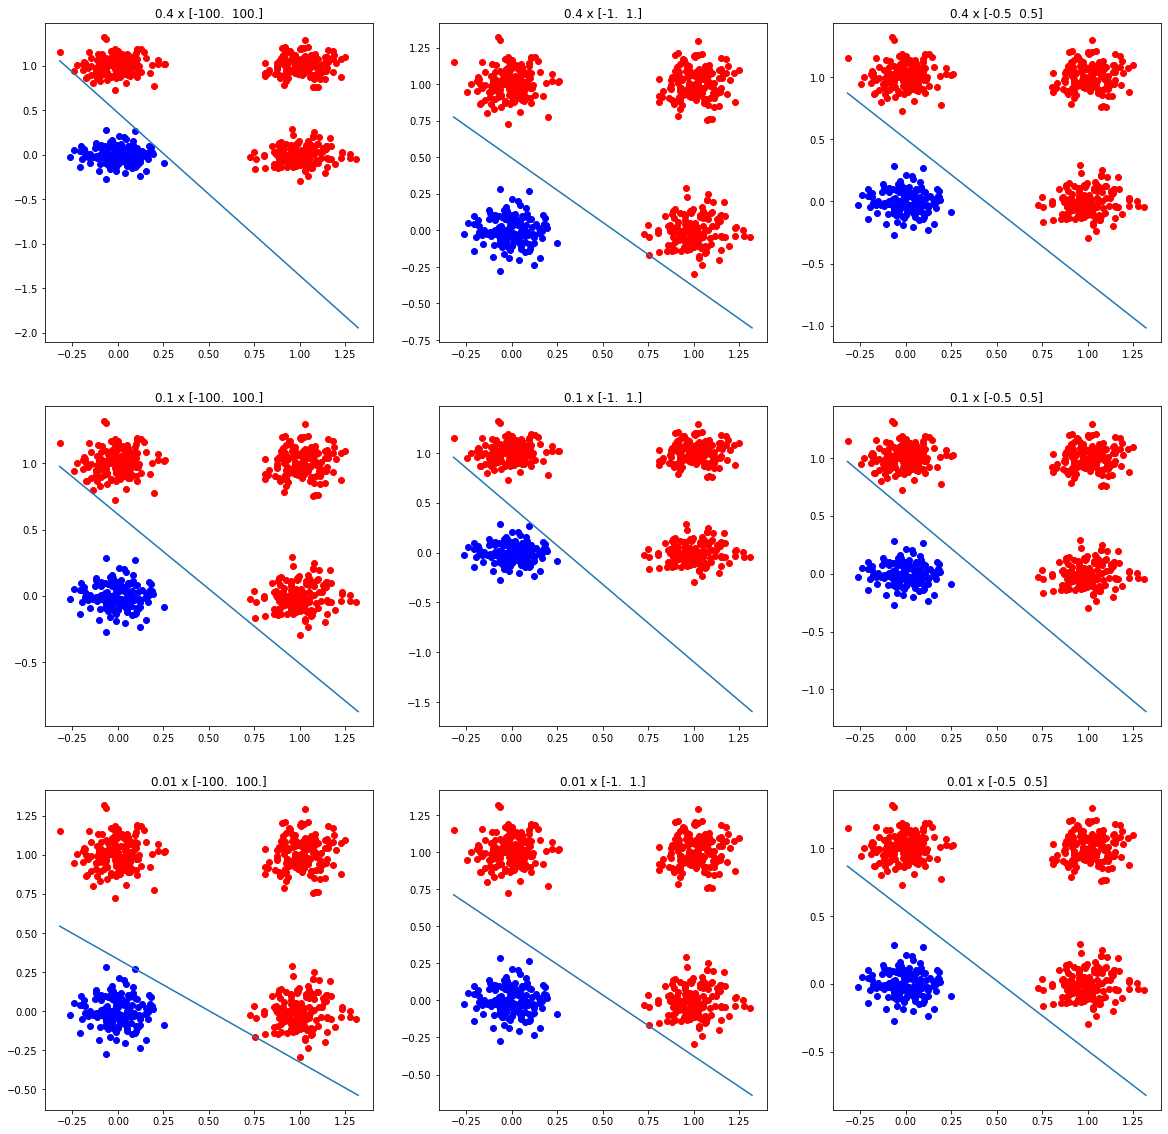

In [31]:
x = intervalo_x(dados_teste)
zero_teste = zero_func(dados_teste)
um_teste = um_func(dados_teste)

figura1, ax_1 = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

k = 0
for i in range(3):
  for j in range(3):
    peso_teste = pesos_9[k]
    ax_1[i,j].scatter(zero_teste[0:,0],zero_teste[0:,1], color='red')  #vermelho
    ax_1[i,j].scatter(um_teste[0:,0],um_teste[0:,1], color='blue')     #Azul
    ax_1[i,j].plot(x, (peso_teste[0]/peso_teste[2]) - ((peso_teste[1]/peso_teste[2]) * x))
    ax_1[i,j].set_title('{} x {}'.format(n[i],I[j]))
    k += 1

figura1.show()

##Gráfico de Média e Desvio Padrão

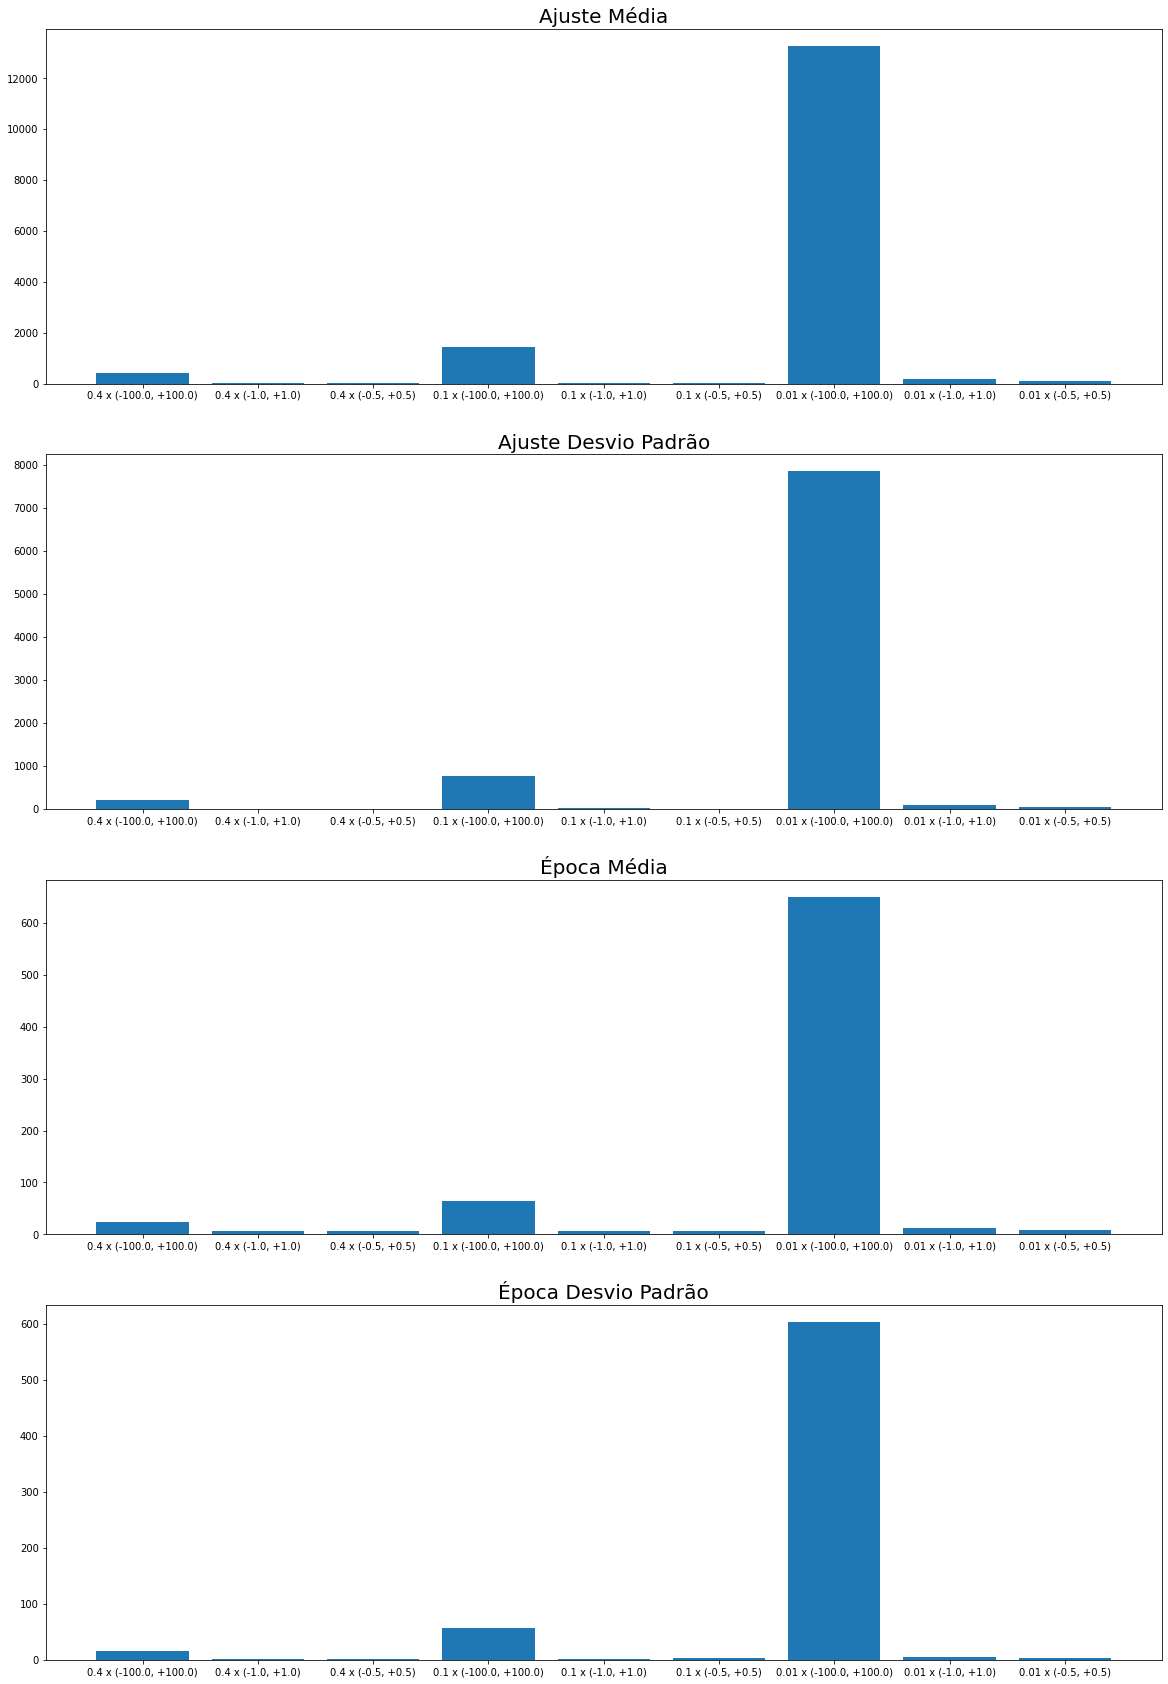

In [32]:
figura2, ax_2 = plt.subplots(nrows= 4, ncols=1, figsize=(20, 30))

titulo_ax = ['Ajuste Média', 'Ajuste Desvio Padrão', 'Época Média', 'Época Desvio Padrão']
nomes = []

for i in range(len(n)):
  for j in range(len(I)):
    nomes.append(str('{} x ({}, +{})'.format(n[i], I[j][0], I[j][1])))

for i in range(4):
  ax_2[i].bar(nomes, m_dp[0:,i])
  ax_2[i].set_title(titulo_ax[i], size=20)

figura2.show()

* A configuração "0,01 x (-100, +100)" se mostrou nitidamente a pior configuração mostrada no gráfico. Não usaria ela em hipótese alguma, pois ela demoraria bastante tempo e exigiria um poder de processamente muito avançado.
* As configurações "0,4 x (-100, +100)" e "0,1 x (-100, +100)" se mostraram intermédiárias.
* As 6 configurações restantes se mostraram muito utilizáveis.
* Conclui-se que quanto maior o intervalo de pesos e menor a taxa de aprendizado mais o algoritmo Perceptron demora para que sua execusão seja finalizada.

#Parte III

In [42]:
arquivo = '/content/drive/My Drive/dados_colab/Redes Neurais/PP2/dataHoldout.txt'
dados_holdout = import_dados(arquivo)

##Gráfico inicial

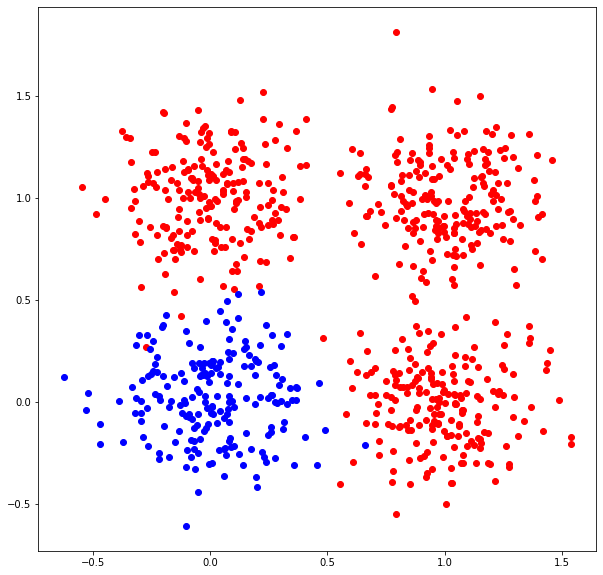

In [43]:
x = intervalo_x(dados_holdout)
zero_holdout = zero_func(dados_holdout)
um_holdout = um_func(dados_holdout)

figura3, aux_3 = plt.subplots(figsize=(10,10))
aux_3.scatter(zero_holdout[0:,0], zero_holdout[0:,1], color='red')
aux_3.scatter(um_holdout[0:,0], um_holdout[0:,1], color='blue')
figura3.show()

##Partições
Os exemplos vão ser divididos em duas partições 70% de treinamento e outra 30% de teste.

In [44]:
tam = len(dados_holdout)
ind_ale = np.random.choice(tam, size=tam, replace=False) #Gerador de índices aleltórios

trinta = int(tam * 0.3) #Trinta por cento da partição
setenta = tam - trinta  #Setenta por cento da pertição

dados_teste = np.empty((0, 3), float)         #Criando a partição de teste
dados_treinamento = np.empty((0, 3), float)   #Criando a partição de treinamento

i = 0
while (i < trinta):   #Insere os exemplos na partição de teste
  temp = np.array([dados_holdout[ind_ale[i]]])
  dados_teste = np.append(dados_teste, temp, axis=0)
  i += 1

while (i < tam):      #Insere os exemplos na partição de treinamento
  temp = np.array([dados_holdout[ind_ale[i]]])
  dados_treinamento = np.append(dados_treinamento, temp, axis=0)
  i += 1


##Perceptron
Algoritmo de treinamento

In [45]:
n = 0.1 #Taxa de aprendizado
teta = 0 #Degrau usado na função de ativação
w = np.random.uniform(-0.5, 0.5, (1, 3)) #Vetor de pesos inicial

def funcao(u): #Função de ativação
  if(u >= teta):
    return 1
  else:
    return 0

i = 0
ult_indice = setenta - 1
encerrar = True
qtd_epocas = 0

while i <= ult_indice and qtd_epocas < 100:

  if (i == 0): #Verifica a a quantidade de épocas
    qtd_epocas += 1
    ind_ale = np.random.choice(setenta, size=setenta, replace=False) #Gerador de índices aleltórios

  linha = dados_treinamento[ind_ale[i]]
  yd = linha[2]
  x = np.array([-1, linha[0], linha[1]])

  u = 0
  for j in range(3):
    u += (x[j] * w[-1][j])

  y = funcao(u) #Chama a função de ativação
  e = yd - y #Erro

  if (e != 0): #Há necessidade de aprendizagem
    w = np.array([w[0] + ((n * e) * x)]) #Delta
    encerrar = False
    total_ajustes += 1

  if (ult_indice == i and encerrar == False): #Última linha
    encerrar = True
    i = -1 #Vai para o começo do array de dados

  i += 1


##Matriz de confusão (Teste)
Efetuando a previsão de saída com o conjunto de teste e preenchendo a matriz de confusão.

In [46]:
def matriz_confusao(dados_func):
  m_c = np.zeros((2,2))

  i = 0
  ult_indice = trinta - 1
  encerrar = True

  while i <= ult_indice:
    linha = dados_func[i]
    yd = linha[2]
    x = np.array([-1, linha[0], linha[1]])

    u = 0
    for j in range(3):
      u += (x[j] * w[-1][j])

    y = funcao(u) #Chama a função de ativação
    i += 1

    #1 = Verdadeiro
    #0 = Falso
    if (y == 1 and yd == 1):
      m_c[0][0] += 1
    elif (y == 0 and yd == 0):
      m_c[1][1] += 1
    elif (y == 0 and yd == 1):
      m_c[1][0] += 1
    elif (y == 1 and yd == 0):
      m_c[0][1] += 1

  return m_c

m_c_teste = matriz_confusao(dados_teste)
print('Matriz de confusão do conjunto de teste')
print(m_c_teste)

Matriz de confusão do conjunto de teste
[[ 58.   6.]
 [  4. 172.]]


##Acurácia (Treinamento)
Apresenta a acurácia do conjunto de treinamento

In [47]:
m_c_treinamento = matriz_confusao(dados_treinamento)

def acuracia_func(m_c):
  return (m_c[0][0] + m_c[1][1]) / (m_c[0][0] + m_c[1][1] + m_c[0][1] + m_c[1][0])

acuraria_treinamento = acuracia_func(m_c_treinamento)
print('Acurácia do conjunto de treinamento: {}'.format(acuraria_treinamento))

Acurácia do conjunto de treinamento: 0.9666666666666667


##Precisão, revocação e F-Score (treinamento)
Apresenta a precisão, revocação e F-Score do conjunto de treinamento.

In [48]:
def precisao_func(m_c):
  return m_c[0][0] / (m_c[0][0] +m_c[0][1])

def revocacao_func(m_c):
  return m_c[0][0] / (m_c[0][0] +m_c[1][0])

def fscore_func(prec, rev):
  return (2 * prec * rev) / (prec + rev)

precisao_treinamento = precisao_func(m_c_treinamento)
revocacao_treinamento = revocacao_func(m_c_treinamento)
fscore_treinamento = fscore_func(precisao_treinamento, revocacao_treinamento)
print('Precisão do conj. de treinamento: {}'.format(precisao_treinamento))
print('Revocação do conj. de treinamento: {}'.format(revocacao_treinamento))
print('F-Score do conj. de treinamento: {}'.format(fscore_treinamento))

Precisão do conj. de treinamento: 0.9253731343283582
Revocação do conj. de treinamento: 0.9538461538461539
F-Score do conj. de treinamento: 0.9393939393939394


O conjunsto de treinamento quase sempre vai ter bons resultados.


##Acurácia, precisão, revocação e F-Score (Teste)
Apresenta-se a acurácia, precisão, revocação e F-Score para o conjunto de testes

In [49]:
teste_acuracia = acuracia_func(m_c_teste)
teste_precisao = precisao_func(m_c_teste)
teste_revocacao = revocacao_func(m_c_teste)
teste_fscore = fscore_func(teste_precisao,teste_revocacao)

print('Acurácia conj. teste: {}'.format(teste_acuracia))
print('Precisão conj. teste: {}'.format(teste_precisao))
print('Revocação conj. teste: {}'.format(teste_revocacao))
print('F-Score conj. teste: {}'.format(teste_fscore))

Acurácia conj. teste: 0.9583333333333334
Precisão conj. teste: 0.90625
Revocação conj. teste: 0.9354838709677419
F-Score conj. teste: 0.9206349206349206


* A precisão alta indica que ele acertou a maior parte dos positivos previstos. 
* A revocação alta indica que ele acertou a maior parte dos positivos dentre todos os positivos reais.
* Com F-Score tem-se uma média harmônica entre precisão e revocação, e foco nos resultados positivos.


##Gráficos de Treinamento e de Testes

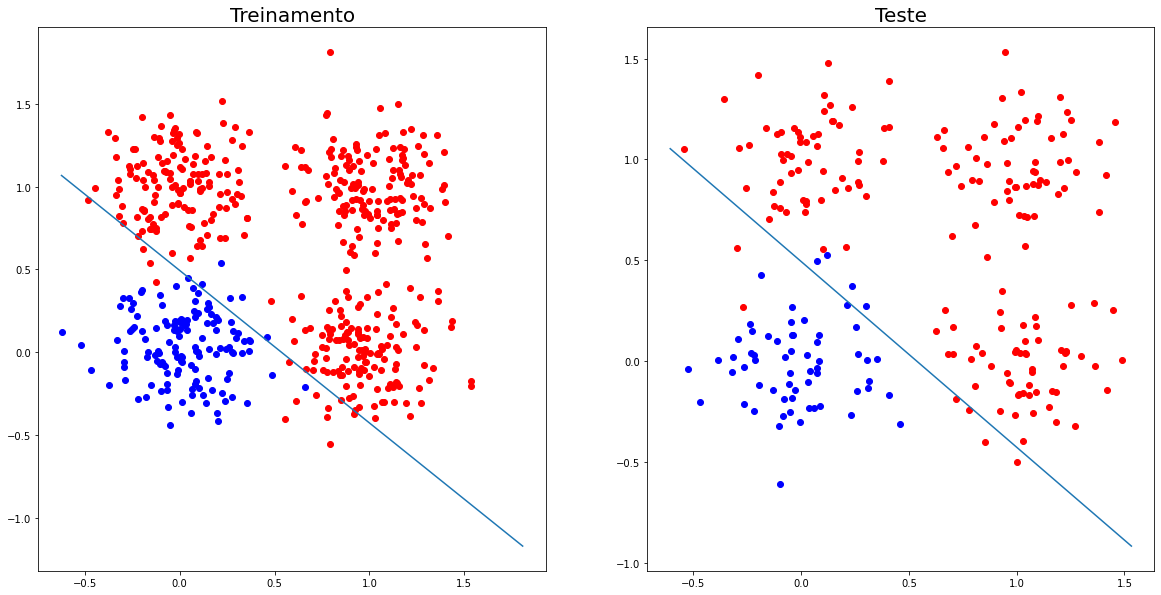

In [50]:
x_trein = intervalo_x(dados_treinamento)
zero_treinamento = zero_func(dados_treinamento)
um_treinamento = um_func(dados_treinamento)

x_teste = intervalo_x(dados_teste)
zero_teste = zero_func(dados_teste)
um_teste = um_func(dados_teste)

peso_obtido = w[0]
figura4, aux_4 = plt.subplots(nrows= 1, ncols=2, figsize=(20,10))

aux_4[0].scatter(zero_treinamento[0:,0], zero_treinamento[0:,1], color='red')
aux_4[0].scatter(um_treinamento[0:,0], um_treinamento[0:,1], color='blue')
aux_4[0].plot(x_trein, (peso_obtido[0]/peso_obtido[2]) - ((peso_obtido[1]/peso_obtido[2]) * x_trein))
aux_4[0].set_title('Treinamento', size=20)

aux_4[1].scatter(zero_teste[0:,0], zero_teste[0:,1], color='red')
aux_4[1].scatter(um_teste[0:,0], um_teste[0:,1], color='blue')
aux_4[1].plot(x_teste, (peso_obtido[0]/peso_obtido[2]) - ((peso_obtido[1]/peso_obtido[2]) * x_teste))
aux_4[1].set_title('Teste', size=20)

figura4.show()

Apesar de não ser possível gerar uma reta que separe totalmente as classes em problemas não-linearmente separáveis, como mostrado nitidamente no gráfico acima, podemos ter alguns problemas em que os dados podem chegar muito próximos de serem linearmente serapáveis. Obtendo assim resultados bem satisfatórios na previsão feita pelo algoritmo Perceptron com F-Score acima de 90%.